In [20]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('../../precleaned-datasets/dataset_2.csv')
data

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.532710,3.280834,1.798248e+01,4.404259,2.349910,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832e+00,0.976806,2.541417
1,5.821374,12.098722,1.330915e+01,4.125599,1.045386,1.832035,1.833494,0.709090,8.652883,0.102757,...,2.479789,7.795290,3.557890,17.383378,15.193423,8.263673,1.878108,5.679390e-01,1.018818,1.416433
2,1.938776,7.952752,9.726712e-01,3.459267,1.935782,0.621463,2.338139,0.344948,9.937850,11.691283,...,1.861487,6.130886,3.401064,15.850471,14.620599,6.849776,1.098210,1.959183e+00,1.575493,1.857893
3,6.020690,9.900544,1.786964e+01,4.366715,1.973693,2.026012,2.853025,0.674847,11.816859,0.011151,...,1.340944,7.240058,2.417235,15.194609,13.553772,7.229971,0.835158,2.234482e+00,0.946170,2.700606
4,3.909506,10.576516,9.341910e-01,3.419572,1.871438,3.340811,1.868282,0.439865,13.585620,1.153366,...,2.738095,6.565509,4.341414,15.893832,11.929787,6.954033,1.853364,5.110269e-01,2.599562,0.811364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,5.392593,1.336383,8.212083e+00,2.966147,2.387417,3.019191,2.289753,0.696969,9.218114,0.451762,...,2.393518,5.486381,2.420444,18.140092,16.388475,5.538263,0.982295,1.851852e+00,3.642670,1.264955
49996,3.544616,5.376492,-5.253303e-07,3.469798,3.473573,4.555753,1.238703,0.332744,15.448531,4.587770,...,2.452819,8.320470,4.880449,17.023601,14.157572,8.354363,1.852349,3.015394e-01,1.312911,1.473906
49997,4.266667,7.618359,1.728767e+01,3.241785,1.264538,2.392204,2.181862,0.703589,13.643899,1.555709,...,2.163462,6.931792,4.603708,18.112407,17.251750,7.588980,2.594008,2.230302e+00,2.525820,2.360954
49998,5.130579,6.749948,1.060437e+01,3.578128,2.770539,2.089231,2.698422,1.165991,11.427852,0.020571,...,0.938087,5.772450,2.003628,17.247582,16.112546,4.295269,0.847949,-5.341621e-07,0.252078,1.767468


In [17]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['target']),
                                                     data['target'],
                                                       test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(40000, 108) (10000, 108) (40000,) (10000,)


In [18]:
# mutual information for classification
mi = mutual_info_classif(X_train, y_train, random_state=42)
mi

array([2.31644997e-03, 5.64405413e-03, 0.00000000e+00, 1.57108547e-03,
       0.00000000e+00, 5.74216091e-03, 3.07113577e-03, 1.78673970e-03,
       1.10407297e-03, 1.23656634e-03, 0.00000000e+00, 3.93752717e-04,
       3.83828860e-04, 3.53472135e-03, 1.77699185e-03, 1.03967259e-02,
       1.78511606e-03, 1.41736336e-03, 0.00000000e+00, 0.00000000e+00,
       5.21005292e-03, 1.16305110e-04, 0.00000000e+00, 1.10270899e-03,
       1.86248780e-03, 1.02938957e-03, 0.00000000e+00, 4.17395147e-05,
       3.21103036e-03, 5.23850875e-03, 0.00000000e+00, 1.03027476e-03,
       4.60079715e-03, 2.12599861e-02, 2.00353031e-03, 3.06488338e-03,
       3.39562135e-03, 3.85153527e-03, 1.93785709e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.33863150e-03, 1.93877690e-03, 1.57045459e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.13812731e-03,
       0.00000000e+00, 3.83933931e-03, 4.07269912e-02, 2.48234438e-03,
      

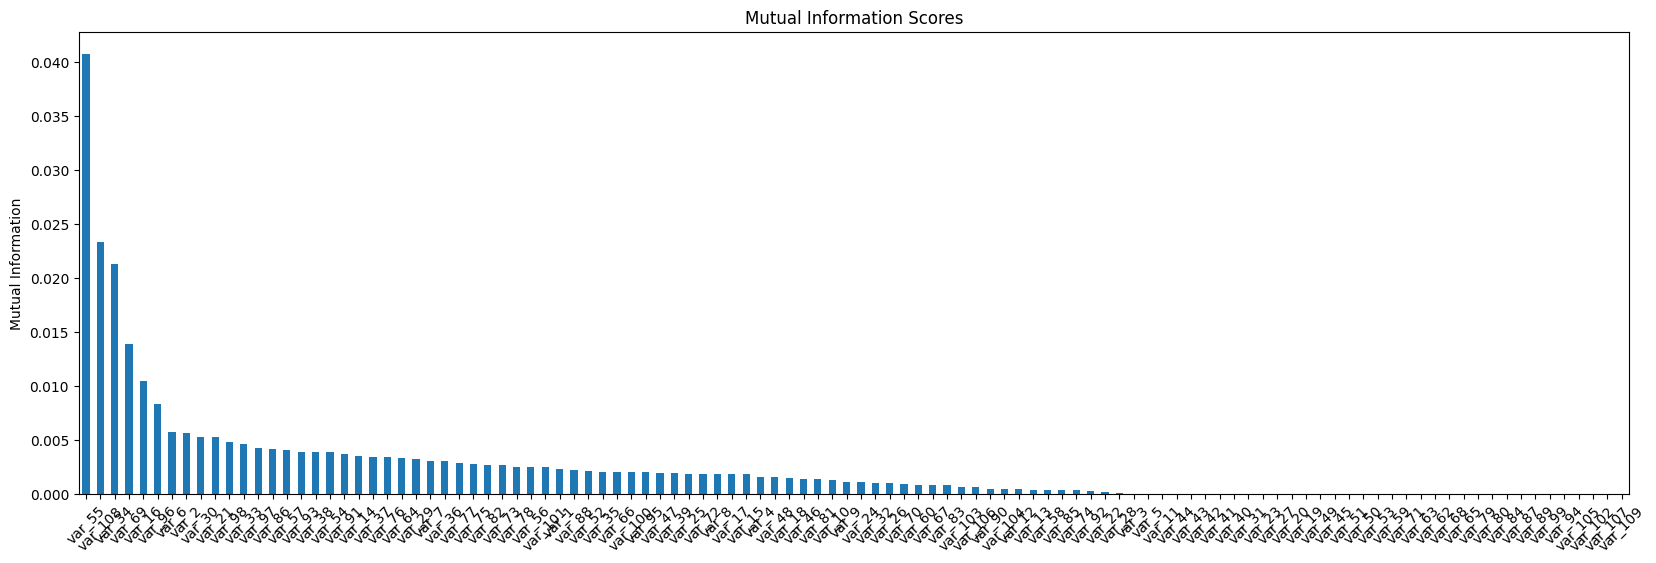

In [19]:
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.title('Mutual Information Scores')
plt.ylabel('Mutual Information')
plt.xticks(rotation=45)
plt.show()

In [21]:
# Selects k best features based on mutual information

selector = SelectKBest(mutual_info_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
X_train_selected.shape, X_test_selected.shape


((40000, 10), (10000, 10))